# Final Capstone Project: Battle of the Neighborhoods
# Comparing Neighborhoods in Oxford, UK and Atlanta, USA 
### Author: Theresa Foster
### Date: 13 May 2020

# 1. Importing Libraries

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

# 2. Uploading and Cleaning the Datasets using Pandas

### Using Watson data 'Insert to Code' to upload the Oxford data set

In [3]:
# The code was removed by Watson Studio for sharing.

,Postal Code,Neighborhood,Latitude,Longitude
0,OX3 0FR,Barton and Sandhills,51.770563,-1.208585
1,OX4 6AA,Blackbird Leys,51.722543,-1.204506
2,OX1 1AA,Carfax,51.750231,-1.267367
3,OX3 0BD,Churchill,51.753788,-1.230251
4,OX4 2BH,Cowley,51.730350,-1.206266


### Using Watson data 'Insert to Code' to the upload first Atlanta data set with postal codes and Neighborhoods

In [4]:

body = client_f4afcc32a749405a820c7a96506e474b.get_object(Bucket='courseracapstonetkf-donotdelete-pr-dmzgetziwgvl02',Key='Atlanta Neighborhoods and zipcodes updated.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_ATL = pd.read_excel(body)
df_data_ATL.head()


,Postal Codes,Neighborhood
0,30002,Avondale Estates
1,30021,Clarkston
2,30030,"City of Decatur, Oakhurst , Winnona Park"
3,30032,East Lake
4,30033,North Decatur


### Using Watson data 'Insert to Code' to upload the second Atlanta dataset with postal codes and Longitude and Latitude data

In [5]:

body = client_f4afcc32a749405a820c7a96506e474b.get_object(Bucket='courseracapstonetkf-donotdelete-pr-dmzgetziwgvl02',Key='USA LL and zipcaodes Atlanta.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_LL = pd.read_excel(body)
df_data_LL.head()


,Zip,City,State,Latitude,Longitude
0,31150,Atlanta,GA,33.844371,-84.474050
1,30334,Atlanta,GA,33.702657,-84.439127
2,30384,Atlanta,GA,33.844371,-84.474050
3,30339,Atlanta,GA,33.875070,-84.466150
4,30354,Atlanta,GA,33.658834,-84.396820


### Using a join to add the Latitude and Longitudes to the first Atlanta data set by postal code and zip code

In [6]:
merged_ATL = pd.merge(left=df_data_ATL, right=df_data_LL, left_on='Postal Codes', right_on='Zip')
# In this case `species_id` is the only column name in  both dataframes, so if we skipped `left_on`
# And `right_on` arguments we would still get the same result

# What's the size of the output data?
merged_ATL.shape
merged_ATL.head()

,Postal Codes,Neighborhood,Zip,City,State,Latitude,Longitude
0,30303,"Central Business District, Fairlee Poplar",30303,Atlanta,GA,33.752856,-84.39013
1,30305,"Buckhead, Garden Hills, Haynes Manor, Peachtre...",30305,Atlanta,GA,33.830054,-84.38472
2,30306,"Virginia Highlands, Morningside/Lenox Park, Po...",30306,Atlanta,GA,33.786755,-84.35149
3,30307,"Candler Park ,Edgewood, Inman Park, Lake Clair...",30307,Atlanta,GA,33.768205,-84.33786
4,30308,"Midtown, Old Fourth Ward",30308,Atlanta,GA,33.771755,-84.38065


### Streamlining the data by dropping unnecessary columns from the new merged Atlanta dataframe

In [7]:
merged_ATL = merged_ATL.drop(['Zip', 'City', 'State'], axis=1)

In [8]:
merged_ATL.head()

,Postal Codes,Neighborhood,Latitude,Longitude
0,30303,"Central Business District, Fairlee Poplar",33.752856,-84.39013
1,30305,"Buckhead, Garden Hills, Haynes Manor, Peachtre...",33.830054,-84.38472
2,30306,"Virginia Highlands, Morningside/Lenox Park, Po...",33.786755,-84.35149
3,30307,"Candler Park ,Edgewood, Inman Park, Lake Clair...",33.768205,-84.33786
4,30308,"Midtown, Old Fourth Ward",33.771755,-84.38065


### Checking the shape of both data frames for Oxford and Atlanta Neighborhoods

In [9]:
merged_ATL.shape

(28, 4)

In [10]:
df_data_OXF.shape

(24, 4)

### Viewing the dataframes side by side to check consistent formatting of the columns and data

In [11]:
horizontal_stack = pd.concat([df_data_OXF, merged_ATL], axis=1)
horizontal_stack

,Postal Code,Neighborhood,Latitude,Longitude,Postal Codes,Neighborhood,Latitude,Longitude
0,OX3 0FR,Barton and Sandhills,51.770563,-1.208585,30303,"Central Business District, Fairlee Poplar",33.752856,-84.39013
1,OX4 6AA,Blackbird Leys,51.722543,-1.204506,30305,"Buckhead, Garden Hills, Haynes Manor, Peachtre...",33.830054,-84.38472
2,OX1 1AA,Carfax,51.750231,-1.267367,30306,"Virginia Highlands, Morningside/Lenox Park, Po...",33.786755,-84.35149
3,OX3 0BD,Churchill,51.753788,-1.230251,30307,"Candler Park ,Edgewood, Inman Park, Lake Clair...",33.768205,-84.33786
4,OX4 2BH,Cowley,51.730350,-1.206266,30308,"Midtown, Old Fourth Ward",33.771755,-84.38065
5,OX4 1PF,Cowley Marsh,51.747236,-1.221107,30309,"Midtown, Ansley Park, Brookwood Hills, Loring ...",33.794055,-84.38525
6,OX3 7AA,Headington,51.758986,-1.214008,30310,"Adair Park, Capitol View, Oakland City, West End",33.727807,-84.41983
7,OX3 0AA,Headington Hill and Northway,51.764410,-1.225289,30311,Cascade,33.724907,-84.47131
8,OX1 1RP,Hinksey Park,51.748010,-1.261638,30312,Grant Park,33.745739,-84.37640
9,OX1 1BN,Holywell,51.747848,-1.255904,30313,Castlebury Hill,33.761223,-84.39599


# 3. Mapping out the nieghborhoods in both cities-Initial Visual Analysis with Folium and Geopy

## 3a. Oxford

### Find the Latitude and Longitude of Oxford, UK

In [12]:
address = 'Oxford, UK'

geolocator = Nominatim(user_agent="Oxf_explorer")
location = geolocator.geocode(address)
latitude_OXF = location.latitude
longitude_OXF = location.longitude
print('The geograpical coordinates of Oxford, UK are {}, {}.'.format(latitude_OXF, longitude_OXF))

The geograpical coordinates of Oxford, UK are 51.7520131, -1.2578499.


### Create a map of Oxford, UK Neighborhoods

In [13]:
map_Oxford = folium.Map(location=[latitude_OXF, longitude_OXF], zoom_start=13)

# add markers to map
for lat, lng, neighborhood in zip(df_data_OXF['Latitude'], df_data_OXF['Longitude'], df_data_OXF['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Oxford)  
    
map_Oxford

## 3b. Atlanta

### Create a Map of Atlanta, GA Neighborhoods

### Find the Latitude and Longitude of Atlanta, GA, USA

In [14]:
address = 'Atlanta, GA'

geolocator = Nominatim(user_agent="Atl_explorer")
location = geolocator.geocode(address)
latitude_ATL = location.latitude
longitude_ATL = location.longitude
print('The geograpical coordinates of Atlanta, GA are {}, {}.'.format(latitude_ATL, longitude_ATL))

The geograpical coordinates of Atlanta, GA are 33.7490987, -84.3901849.


In [15]:
map_Atlanta = folium.Map(location=[latitude_ATL, longitude_ATL], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(merged_ATL['Latitude'], merged_ATL['Longitude'], merged_ATL['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Atlanta)  
    
map_Atlanta

# 4. Define Foursquare API credentials to set up source for neighborhood venue analysis

In [16]:
CLIENT_ID = 'RKTDGK0OLPAEWNXLU1EWZHS32ZCGF2GYYQPUWKGX0HF01P4E' # your Foursquare ID
CLIENT_SECRET = '0M5NZXYUPUYSUVK134HLG4MY5SYTHQDDUVZU21TNHYG5JSG3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RKTDGK0OLPAEWNXLU1EWZHS32ZCGF2GYYQPUWKGX0HF01P4E
CLIENT_SECRET:0M5NZXYUPUYSUVK134HLG4MY5SYTHQDDUVZU21TNHYG5JSG3


# 5. Oxford, UK: Data retrieval, Analysis and Mapping

## 5a. Retrieve the venue data for Oxford Neighborhoods and clean the dataset

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues_OXF = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues_OXF.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues_OXF)

In [18]:
Oxford_venues = getNearbyVenues(names=df_data_OXF['Neighborhood'],
                                   latitudes=df_data_OXF['Latitude'],
                                   longitudes=df_data_OXF['Longitude']
                                  )

Barton and Sandhills
Blackbird Leys
Carfax
Churchill
Cowley
Cowley Marsh
Headington
Headington Hill and Northway
Hinksey Park
Holywell
Iffley Fields
Jericho and Osney
Littlemore
Lye Valley
Marston
North
Northfield Brook
Quarry and Risinghurst
Rose Hill and Iffley
St Clement's
St Margaret's
St Mary's
Summertown
Wolvercote


### View the Oxford venues dataframe shape and first 5 rows

In [19]:
print(Oxford_venues.shape)
Oxford_venues.head()

(375, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barton and Sandhills,51.770563,-1.208585,bus stop barton village road,51.768160,-1.203738,Bus Stop
1,Barton and Sandhills,51.770563,-1.208585,Booty,51.766914,-1.210675,Boutique
2,Blackbird Leys,51.722543,-1.204506,Soundworks,51.722242,-1.201936,Music Venue
3,Blackbird Leys,51.722543,-1.204506,The Blackbird,51.721002,-1.202126,Pub
4,Blackbird Leys,51.722543,-1.204506,Delteys Supermarket,51.720504,-1.202680,Convenience Store


In [20]:
print('There are {} uniques categories of venues.'.format(len(Oxford_venues['Venue Category'].unique())))
(Oxford_venues.groupby('Neighborhood').count())

There are 102 uniques categories of venues.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Barton and Sandhills,2,2,2,2,2,2
Blackbird Leys,5,5,5,5,5,5
Carfax,62,62,62,62,62,62
Churchill,5,5,5,5,5,5
Cowley,12,12,12,12,12,12
Headington,27,27,27,27,27,27
Headington Hill and Northway,5,5,5,5,5,5
Hinksey Park,44,44,44,44,44,44
Holywell,47,47,47,47,47,47


### Use one-hot encoding to code the venues by category in Oxford Neighborhoods

In [21]:
# one hot encoding
Oxford_onehot = pd.get_dummies(Oxford_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Oxford_onehot['Neighborhood'] = Oxford_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Oxford_onehot.columns[-1]] + list(Oxford_onehot.columns[:-1])
Oxford_onehot = Oxford_onehot[fixed_columns]

Oxford_onehot.head()

,Neighborhood,American Restaurant,Art Gallery,Asian Restaurant,Bakery,Bar,Beer Bar,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Bubble Tea Shop,Burger Joint,Bus Stop,Café,Canal,Canal Lock,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Concert Hall,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flower Shop,Food Truck,French Restaurant,Garden,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,History Museum,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Lebanese Restaurant,Liquor Store,Malay Restaurant,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music Venue,Nature Preserve,Nightclub,Noodle House,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,Roof Deck,Sandwich Place,Scandinavian Restaurant,Shopping Mall,Skating Rink,Spanish Restaurant,Sporting Goods Shop,Sri Lankan Restaurant,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Trail,Turkish Restaurant,Vietnamese Restaurant,Wine Bar
0,Barton and Sandhills,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Barton and Sandhills,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Blackbird Leys,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Blackbird Leys,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Blackbird Leys,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### List the mean frequency of venue categories in each Oxford Neighborhood 

In [22]:
Oxford_grouped = Oxford_onehot.groupby('Neighborhood').mean().reset_index()
Oxford_grouped

,Neighborhood,American Restaurant,Art Gallery,Asian Restaurant,Bakery,Bar,Beer Bar,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Bubble Tea Shop,Burger Joint,Bus Stop,Café,Canal,Canal Lock,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Concert Hall,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flower Shop,Food Truck,French Restaurant,Garden,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,History Museum,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Lebanese Restaurant,Liquor Store,Malay Restaurant,Market,Mediterranean Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music Venue,Nature Preserve,Nightclub,Noodle House,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,Roof Deck,Sandwich Place,Scandinavian Restaurant,Shopping Mall,Skating Rink,Spanish Restaurant,Sporting Goods Shop,Sri Lankan Restaurant,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Trail,Turkish Restaurant,Vietnamese Restaurant,Wine Bar
0,Barton and Sandhills,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
1,Blackbird Leys,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.200000,0.000000,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
2,Carfax,0.016129,0.000000,0.000000,0.032258,0.064516,0.000000,0.000000,0.016129,0.0,0.000000,0.016129,0.000000,0.016129,0.000000,0.032258,0.016129,0.016129,0.000000,0.032258,0.016129,0.000000,0.016129,0.000000,0.000000,0.0,0.000000,0.000000,0.016129,0.000000,0.000000,0.016129,0.000000,0.00,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032258,0.048387,0.016129,0.000000,0.048387,0.032258,0.016129,0.00,0.016129,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.016129,0.000000,0.000000,0.000000,0.064516,0.000000,0.000000,0.0,0.000000,0.000000,0.032258,0.016129,0.0,0.016129,0.0,0.032258,0.080645,0.016129,0.000000,0.0,0.016129,0.000000,0.016129,0.032258,0.016129,0.016129,0.016129,0.000000,0.000000,0.000,0.016129,0.00000

### Check the shape of the new dataframe

In [23]:
Oxford_grouped.shape

(23, 103)

### View the Top 5 venues in each Oxford Neighborhood

In [24]:
num_top_venues = 5

for hood in Oxford_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Oxford_grouped[Oxford_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barton and Sandhills----
         venue  freq
0     Bus Stop   0.5
1     Boutique   0.5
2  Music Venue   0.0
3        Plaza   0.0
4   Playground   0.0


----Blackbird Leys----
               venue  freq
0                Pub   0.2
1        Music Venue   0.2
2  Convenience Store   0.2
3  Recreation Center   0.2
4           Bus Stop   0.2


----Carfax----
               venue  freq
0                Pub  0.08
1                Bar  0.06
2          Nightclub  0.06
3  Indian Restaurant  0.05
4              Hotel  0.05


----Churchill----
                  venue  freq
0         Deli / Bodega   0.2
1                  Café   0.2
2           Coffee Shop   0.2
3  Gym / Fitness Center   0.2
4                  Park   0.2


----Cowley----
                  venue  freq
0                Market  0.08
1           Supermarket  0.08
2                   Pub  0.08
3  Fast Food Restaurant  0.08
4           Coffee Shop  0.08


----Headington----
                venue  freq
0       Grocery Store  0.15
1    

### Now make a dataframe with the top 10 venues in each neighborhood

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
OXF_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
OXF_neighborhoods_venues_sorted['Neighborhood'] = Oxford_grouped['Neighborhood']

for ind in np.arange(Oxford_grouped.shape[0]):
    OXF_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Oxford_grouped.iloc[ind, :], num_top_venues)

OXF_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barton and Sandhills,Bus Stop,Boutique,Wine Bar,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Field
1,Blackbird Leys,Bus Stop,Pub,Recreation Center,Music Venue,Convenience Store,Wine Bar,Department Store,Dessert Shop,Discount Store,Donut Shop
2,Carfax,Pub,Bar,Nightclub,Hotel,Indian Restaurant,Pizza Place,Sandwich Place,Portuguese Restaurant,Bakery,Hostel
3,Churchill,Coffee Shop,Gym / Fitness Center,Park,Café,Deli / Bodega,Wine Bar,Fish & Chips Shop,Dessert Shop,Discount Store,Donut Shop
4,Cowley,Hotel,Clothing Store,Fast Food Restaurant,Electronics Store,Sporting Goods Shop,Market,Pub,Supermarket,Grocery Store,Gym / Fitness Center


## 5b. Cluster the Oxford Neighborhoods using K-Means

### Using metrics to determine the best value for K

In [26]:
from sklearn.metrics import silhouette_score

sil=[]
K_sil= range(2,10)
Oxford_grouped_clustering = Oxford_grouped.drop('Neighborhood', 1)
for k in K_sil:
    print(k, end='')
    kmeans=KMeans(n_clusters= k).fit(Oxford_grouped_clustering)
    labels= kmeans.labels_
    sil.append(silhouette_score(Oxford_grouped_clustering, labels, metric='euclidean'))

23456789

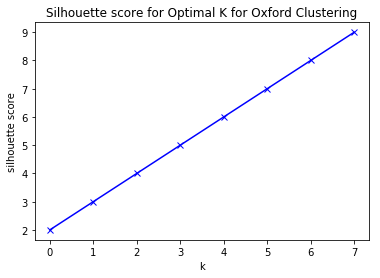

In [28]:
import matplotlib.pyplot as plt
plt.plot(K_sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette score for Optimal K for Oxford Clustering')
plt.show()

In [29]:
sum_of_squared_distances = []
K=range(2,10)
Oxford_grouped_clustering = Oxford_grouped.drop('Neighborhood', 1)
for k in K:
    print(k, end='')
    kmeans=KMeans(n_clusters= k).fit(Oxford_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

23456789

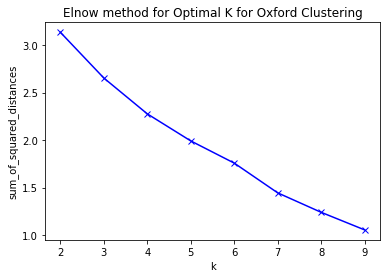

In [30]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elnow method for Optimal K for Oxford Clustering')
plt.show()

## 5c. Setting K and creating clusters

In [31]:
kclusters = 5

Oxford_grouped_clustering = Oxford_grouped.drop('Neighborhood', 1)

kmeansOXF = KMeans(n_clusters=kclusters, random_state=0).fit(Oxford_grouped_clustering)

kmeansOXF.labels_[1:10] 

array([4, 4, 3, 4, 4, 3, 4, 4, 1], dtype=int32)

### Create a new dataframe with the cluster labels appended as a column

In [32]:
OXF_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeansOXF.labels_)

Oxford_merged = df_data_OXF

Oxford_merged = Oxford_merged.join(OXF_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [33]:
Oxford_merged.head()

,Postal Code,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,OX3 0FR,Barton and Sandhills,51.770563,-1.208585,0.0,Bus Stop,Boutique,Wine Bar,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Field
1,OX4 6AA,Blackbird Leys,51.722543,-1.204506,4.0,Bus Stop,Pub,Recreation Center,Music Venue,Convenience Store,Wine Bar,Department Store,Dessert Shop,Discount Store,Donut Shop
2,OX1 1AA,Carfax,51.750231,-1.267367,4.0,Pub,Bar,Nightclub,Hotel,Indian Restaurant,Pizza Place,Sandwich Place,Portuguese Restaurant,Bakery,Hostel
3,OX3 0BD,Churchill,51.753788,-1.230251,3.0,Coffee Shop,Gym / Fitness Center,Park,Café,Deli / Bodega,Wine Bar,Fish & Chips Shop,Dessert Shop,Discount Store,Donut Shop
4,OX4 2BH,Cowley,51.730350,-1.206266,4.0,Hotel,Clothing Store,Fast Food Restaurant,Electronics Store,Sporting Goods Shop,Market,Pub,Supermarket,Grocery Store,Gym / Fitness Center


   ### Make sure the Cluster Labels are integers and not floats as they will not map properly otherwise

In [34]:
Oxford_merged_Final = Oxford_merged.dropna()
Oxford_merged_Final['Cluster Labels'] =Oxford_merged_Final['Cluster Labels'].astype(int)
Oxford_merged_Final.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Postal Code,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,OX3 0FR,Barton and Sandhills,51.770563,-1.208585,0,Bus Stop,Boutique,Wine Bar,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Field
1,OX4 6AA,Blackbird Leys,51.722543,-1.204506,4,Bus Stop,Pub,Recreation Center,Music Venue,Convenience Store,Wine Bar,Department Store,Dessert Shop,Discount Store,Donut Shop
2,OX1 1AA,Carfax,51.750231,-1.267367,4,Pub,Bar,Nightclub,Hotel,Indian Restaurant,Pizza Place,Sandwich Place,Portuguese Restaurant,Bakery,Hostel
3,OX3 0BD,Churchill,51.753788,-1.230251,3,Coffee Shop,Gym / Fitness Center,Park,Café,Deli / Bodega,Wine Bar,Fish & Chips Shop,Dessert Shop,Discount Store,Donut Shop
4,OX4 2BH,Cowley,51.730350,-1.206266,4,Hotel,Clothing Store,Fast Food Restaurant,Electronics Store,Sporting Goods Shop,Market,Pub,Supermarket,Grocery Store,Gym / Fitness Center


## 5d. Map the clustered Neighborhoods in Oxford UK 

In [35]:
map_oxford_clusters = folium.Map(location=[latitude_OXF, longitude_OXF], zoom_start=13)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(Oxford_merged_Final['Latitude'], Oxford_merged_Final['Longitude'], Oxford_merged_Final['Neighborhood'], Oxford_merged_Final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color= rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster -1],
        fill_opacity=0.9).add_to(map_oxford_clusters)
       
map_oxford_clusters

In [ ]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

## 5e. View a list of each cluster to determine the top venues in each and label them

### Cluster 0 (Red): Bus Transport, Boutiques and Food

In [38]:
Oxford_merged_Final.loc[Oxford_merged_Final['Cluster Labels'] == 0, Oxford_merged_Final.columns[[1] + list(range(5, Oxford_merged_Final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barton and Sandhills,Bus Stop,Boutique,Wine Bar,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Field


### Cluster 1 (Purple): Pubs and Gyms

In [39]:
Oxford_merged_Final.loc[Oxford_merged_Final['Cluster Labels'] == 1, Oxford_merged_Final.columns[[1] + list(range(5, Oxford_merged_Final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Iffley Fields,Pub,College Gym,Thai Restaurant,Flower Shop,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Electronics Store


### Cluster 2 (Light Blue): Small Shops and Food

In [40]:
Oxford_merged_Final.loc[Oxford_merged_Final['Cluster Labels'] == 2, Oxford_merged_Final.columns[[1] + list(range(5, Oxford_merged_Final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Littlemore,Miscellaneous Shop,Wine Bar,Food Truck,Department Store,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant


### Cluster 3 (Light Green): Cafes and Parks

In [41]:
Oxford_merged_Final.loc[Oxford_merged_Final['Cluster Labels'] == 3, Oxford_merged_Final.columns[[1] + list(range(5, Oxford_merged_Final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Churchill,Coffee Shop,Gym / Fitness Center,Park,Café,Deli / Bodega,Wine Bar,Fish & Chips Shop,Dessert Shop,Discount Store,Donut Shop
7,Headington Hill and Northway,Café,Coffee Shop,Nightclub,Sandwich Place,Wine Bar,Fish & Chips Shop,Dessert Shop,Discount Store,Donut Shop,Electronics Store
20,St Margaret's,Park,Deli / Bodega,Pub,Convenience Store,Department Store,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Farmers Market


### Cluster 4 (Orange): Pubs, Shopping Mall, Restaurants, Museums and Bars

In [42]:
Oxford_merged_Final.loc[Oxford_merged_Final['Cluster Labels'] == 4, Oxford_merged_Final.columns[[1] + list(range(5, Oxford_merged_Final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Blackbird Leys,Bus Stop,Pub,Recreation Center,Music Venue,Convenience Store,Wine Bar,Department Store,Dessert Shop,Discount Store,Donut Shop
2,Carfax,Pub,Bar,Nightclub,Hotel,Indian Restaurant,Pizza Place,Sandwich Place,Portuguese Restaurant,Bakery,Hostel
4,Cowley,Hotel,Clothing Store,Fast Food Restaurant,Electronics Store,Sporting Goods Shop,Market,Pub,Supermarket,Grocery Store,Gym / Fitness Center
6,Headington,Grocery Store,Supermarket,Sandwich Place,Bus Stop,Coffee Shop,Pub,Chinese Restaurant,Café,Pharmacy,Pizza Place
8,Hinksey Park,Pub,Café,Bakery,Bar,Lebanese Restaurant,Hotel,Ice Cream Shop,Gym / Fitness Center,Museum,Movie Theater
9,Holywell,Pub,Bakery,Sandwich Place,Art Gallery,Bar,Indian Restaurant,Scandinavian Restaurant,Ice Cream Shop,Movie Theater,Vietnamese Restaurant
11,Jericho and Osney,Pub,Middle Eastern Restaurant,Greek Restaurant,Fish & Chips Shop,Flower Shop,Café,Pizza Place,French Restaurant,Chinese Restaurant,Gym
13,Lye Valley,Bus Stop,Nature Preserve,Coffee Shop,Pub,Chinese Restaurant,Pharmacy,Indian Restaurant,Gym,Grocery Store,Dessert Shop
14,Marston,Trail,Bar,Liquor Store,Park,Wine Bar,Flower Shop,Department Store,Dessert Shop,Discount Store,Donut Shop
15,North,Pub,History Museum,French Restaurant,Italian Restaurant,Pizza Place,Cocktail Bar,Café,Coffee Shop,Convenience Store,Electronics Store


# 6. Atlanta, USA: Data retrieval, Analysis and Mapping

## 6a. Set up the Foursquare API code to retrieve venue data on Atlanta Neighborhoods and clean the dataset

In [36]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues_ATL = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues_ATL.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues_ATL)

In [37]:
Atlanta_venues = getNearbyVenues(names=merged_ATL['Neighborhood'],
                                   latitudes=merged_ATL['Latitude'],
                                   longitudes=merged_ATL['Longitude']
                                  )

Central Business District, Fairlee Poplar
Buckhead, Garden Hills, Haynes Manor, Peachtree Battle, Peachtree Hills, Tuxedo Park
Virginia Highlands, Morningside/Lenox Park, Poncey-Highland, Druid Hills
Candler Park ,Edgewood, Inman Park, Lake Claire, Little Five Points
Midtown, Old Fourth Ward
Midtown, Ansley Park, Brookwood Hills, Loring Heights
Adair Park, Capitol View, Oakland City, West End
Cascade
Grant Park
Castlebury Hill
Vines City, Mozely Park
Peoplestown - Lakewood
Cabbagetown, East Atlanta Village, Ormewood Park
Kirkwood, Edgewood, East Lake
Home Park, Collier Hills, Underwood Hills
Brookhaven, Dunwoody
Morningside/Lenox Park, Piedmont Heights, Lenox
Lenox
Buckhead
Emory, Toco Hills, Briarcliff
College Park
Vinings
Northlake, Tucker
Chamblee
North Buckhead, Chastain Park
East Point
Briarcliff Woods, Oak Grove, Northlake
 Hapeville


### View the Atlanta venues dataframe shape and first 5 rows

In [38]:
print(Atlanta_venues.shape)
Atlanta_venues.head()

(471, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Central Business District, Fairlee Poplar",33.752856,-84.39013,Walgreens,33.754345,-84.389484,Pharmacy
1,"Central Business District, Fairlee Poplar",33.752856,-84.39013,Ebrik Coffee Room,33.753897,-84.388782,Coffee Shop
2,"Central Business District, Fairlee Poplar",33.752856,-84.39013,The Masquerade,33.751720,-84.389739,Music Venue
3,"Central Business District, Fairlee Poplar",33.752856,-84.39013,Weekday Cafe,33.754278,-84.388892,Burger Joint
4,"Central Business District, Fairlee Poplar",33.752856,-84.39013,Blossom Tree,33.755496,-84.389006,Korean Restaurant


In [39]:
print('There are {} uniques categories of venues.'.format(len(Atlanta_venues['Venue Category'].unique())))
(Atlanta_venues.groupby('Neighborhood').count())

There are 168 uniques categories of venues.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adair Park, Capitol View, Oakland City, West End",16,16,16,16,16,16
"Briarcliff Woods, Oak Grove, Northlake",1,1,1,1,1,1
"Brookhaven, Dunwoody",35,35,35,35,35,35
Buckhead,1,1,1,1,1,1
"Buckhead, Garden Hills, Haynes Manor, Peachtree Battle, Peachtree Hills, Tuxedo Park",20,20,20,20,20,20
"Cabbagetown, East Atlanta Village, Ormewood Park",4,4,4,4,4,4
"Candler Park ,Edgewood, Inman Park, Lake Claire, Little Five Points",8,8,8,8,8,8
Castlebury Hill,82,82,82,82,82,82
"Central Business District, Fairlee Poplar",36,36,36,36,36,36


### Use one-hot encoding to code Atlanta venues by category

In [40]:
# one hot encoding
Atlanta_onehot = pd.get_dummies(Atlanta_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Atlanta_onehot['Neighborhood'] = Atlanta_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Atlanta_onehot.columns[-1]] + list(Atlanta_onehot.columns[:-1])
Atlanta_onehot = Atlanta_onehot[fixed_columns]

Atlanta_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bar,Basketball Court,Basketball Stadium,Beer Store,Big Box Store,Boutique,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Business Service,Cafeteria,Café,Caribbean Restaurant,Cemetery,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College & University,College Basketball Court,Comedy Club,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Diner,Discount Store,Doctor's Office,Donut Shop,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food,Food Court,Food Service,Football Stadium,Fountain,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,History Museum,Home Service,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Leather Goods Store,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,New American Restaurant,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Parking,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pop-Up Shop,Pub,Public Art,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Trail,Tram Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Vineyard,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,"Central Business District, Fairlee Poplar",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Central Business District, Fairlee Poplar",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Central Business District, Fairlee Poplar",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Central Business District, Fairlee Poplar",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Central Business Distric

### List the mean frequency of each venue category in each Atlanta Neighborhood

In [41]:
Atlanta_grouped = Atlanta_onehot.groupby('Neighborhood').mean().reset_index()
Atlanta_grouped

,Neighborhood,Accessories Store,American Restaurant,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bar,Basketball Court,Basketball Stadium,Beer Store,Big Box Store,Boutique,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Business Service,Cafeteria,Café,Caribbean Restaurant,Cemetery,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College & University,College Basketball Court,Comedy Club,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Diner,Discount Store,Doctor's Office,Donut Shop,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food,Food Court,Food Service,Football Stadium,Fountain,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,History Museum,Home Service,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Leather Goods Store,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,New American Restaurant,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Parking,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pop-Up Shop,Pub,Public Art,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Trail,Tram Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Vineyard,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,"Adair Park, Capitol View, Oakland City, West End",0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0625,0.000000,0.062500,0.000000,0.187500,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.062500,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.062500,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0625,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000,0.000000,0.00000,0.0625,0.000000,0.0625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0625,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.000000,0.0625,0.062500,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0000,0.000000,0.000000
1,"Briarcliff Woods, Oak Grove, Northlake",0.00000,0.000000,0.000000

### Check the shape of the new dataframe

In [42]:
Atlanta_grouped.shape

(26, 169)

### List the Top 5 venues in each neighborhood in Atlanta

In [43]:
num_top_venues = 5

for hood in Atlanta_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Atlanta_grouped[Atlanta_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adair Park, Capitol View, Oakland City, West End----
                           venue  freq
0                        Brewery  0.19
1                      Juice Bar  0.06
2                          Trail  0.06
3                           Food  0.06
4  Paper / Office Supplies Store  0.06


----Briarcliff Woods, Oak Grove, Northlake----
                   venue  freq
0                   Lake   1.0
1      Accessories Store   0.0
2  Performing Arts Venue   0.0
3            Music Venue   0.0
4             Nail Salon   0.0


----Brookhaven, Dunwoody----
                  venue  freq
0   American Restaurant  0.09
1  Gym / Fitness Center  0.09
2    Mexican Restaurant  0.06
3        Sandwich Place  0.06
4    Frozen Yogurt Shop  0.06


----Buckhead----
                     venue  freq
0     Gym / Fitness Center   1.0
1        Accessories Store   0.0
2              Music Venue   0.0
3               Nail Salon   0.0
4  New American Restaurant   0.0


----Buckhead, Garden Hills, Haynes Manor, Pe

### Make a dataframe with the Top 10 Venues in each Atlanta Neighborhood

In [44]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
ATL_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
ATL_neighborhoods_venues_sorted['Neighborhood'] = Atlanta_grouped['Neighborhood']

for ind in np.arange(Atlanta_grouped.shape[0]):
    ATL_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Atlanta_grouped.iloc[ind, :], num_top_venues)

ATL_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adair Park, Capitol View, Oakland City, West End",Brewery,Trail,Thrift / Vintage Store,Liquor Store,Beer Store,Market,Food,Paper / Office Supplies Store,Boutique,Juice Bar
1,"Briarcliff Woods, Oak Grove, Northlake",Lake,Zoo Exhibit,Fast Food Restaurant,Fried Chicken Joint,Fountain,Football Stadium,Food Service,Food Court,Food,Flower Shop
2,"Brookhaven, Dunwoody",American Restaurant,Gym / Fitness Center,Ice Cream Shop,Sandwich Place,Frozen Yogurt Shop,Mexican Restaurant,Irish Pub,Pizza Place,Soup Place,Shopping Mall
3,Buckhead,Gym / Fitness Center,Fast Food Restaurant,Fried Chicken Joint,Fountain,Football Stadium,Food Service,Food Court,Food,Flower Shop,Fish Market
4,"Buckhead, Garden Hills, Haynes Manor, Peachtre...",Italian Restaurant,Café,Basketball Court,Shipping Store,Mobile Phone Shop,Sandwich Place,Salon / Barbershop,Farmers Market,Sushi Restaurant,Cosmetics Shop


## 6b. Cluster Atlanta Neighborhoods using K-Means

### Use metrics to determine the best value for K

### Silhouette Method

23456789

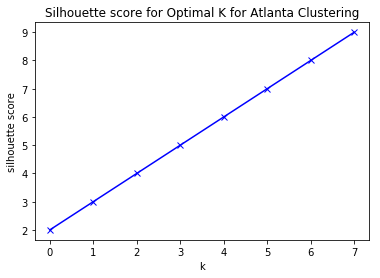

In [45]:
sil=[]
K_sil= range(2,10)
Atlanta_grouped_clustering = Atlanta_grouped.drop('Neighborhood', 1)
for k in K_sil:
    print(k, end='')
    kmeansATL=KMeans(n_clusters= k).fit(Atlanta_grouped_clustering)
    labels= kmeansATL.labels_
    sil.append(silhouette_score(Atlanta_grouped_clustering, labels, metric='euclidean'))
    
    import matplotlib.pyplot as plt
plt.plot(K_sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette score for Optimal K for Atlanta Clustering')
plt.show()

### Elbow Method

23456789

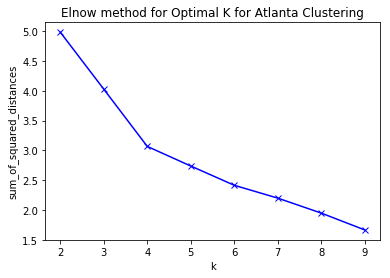

In [46]:
sum_of_squared_distances = []
K=range(2,10)
Atlanta_grouped_clustering = Atlanta_grouped.drop('Neighborhood', 1)
for k in K:
    print(k, end='')
    kmeansATL=KMeans(n_clusters= k).fit(Atlanta_grouped_clustering)
    sum_of_squared_distances.append(kmeansATL.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elnow method for Optimal K for Atlanta Clustering')
plt.show()

## 6c. Setting K and Clustering Neighborhoods

In [47]:
kclusters = 6

Atlanta_grouped_clustering = Atlanta_grouped.drop('Neighborhood', 1)

kmeans_Atlanta = KMeans(n_clusters=kclusters, random_state=0).fit(Atlanta_grouped_clustering)

kmeans_Atlanta.labels_[1:10] 

array([3, 0, 2, 0, 0, 0, 0, 0, 0], dtype=int32)

### Create a new dataframe with cluster labels appended

In [48]:
ATL_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans_Atlanta.labels_)

ATL_merged2 = merged_ATL

ATL_merged2 = ATL_merged2.join(ATL_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [49]:
ATL_merged2.head()

,Postal Codes,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,30303,"Central Business District, Fairlee Poplar",33.752856,-84.39013,0.0,Sandwich Place,Mexican Restaurant,Theater,Smoothie Shop,Korean Restaurant,Burger Joint,Poke Place,Deli / Bodega,Café,Caribbean Restaurant
1,30305,"Buckhead, Garden Hills, Haynes Manor, Peachtre...",33.830054,-84.38472,0.0,Italian Restaurant,Café,Basketball Court,Shipping Store,Mobile Phone Shop,Sandwich Place,Salon / Barbershop,Farmers Market,Sushi Restaurant,Cosmetics Shop
2,30306,"Virginia Highlands, Morningside/Lenox Park, Po...",33.786755,-84.35149,0.0,Doctor's Office,Thai Restaurant,Pet Store,Deli / Bodega,Coffee Shop,Café,Burger Joint,Massage Studio,Boutique,Gift Shop
3,30307,"Candler Park ,Edgewood, Inman Park, Lake Clair...",33.768205,-84.33786,0.0,Playground,Athletics & Sports,Church,Golf Course,Tennis Court,Outdoor Sculpture,Park,Basketball Court,Falafel Restaurant,Exhibit
4,30308,"Midtown, Old Fourth Ward",33.771755,-84.38065,0.0,Southern / Soul Food Restaurant,Hotel,Gay Bar,Pizza Place,Donut Shop,Hookah Bar,New American Restaurant,Nail Salon,Cuban Restaurant,Coffee Shop


### Make sure the Cluster labels are Integers

In [50]:
Atlanta_merged_Final = ATL_merged2.dropna()
Atlanta_merged_Final['Cluster Labels'] =Atlanta_merged_Final['Cluster Labels'].astype(int)
Atlanta_merged_Final.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Postal Codes,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,30303,"Central Business District, Fairlee Poplar",33.752856,-84.39013,0,Sandwich Place,Mexican Restaurant,Theater,Smoothie Shop,Korean Restaurant,Burger Joint,Poke Place,Deli / Bodega,Café,Caribbean Restaurant
1,30305,"Buckhead, Garden Hills, Haynes Manor, Peachtre...",33.830054,-84.38472,0,Italian Restaurant,Café,Basketball Court,Shipping Store,Mobile Phone Shop,Sandwich Place,Salon / Barbershop,Farmers Market,Sushi Restaurant,Cosmetics Shop
2,30306,"Virginia Highlands, Morningside/Lenox Park, Po...",33.786755,-84.35149,0,Doctor's Office,Thai Restaurant,Pet Store,Deli / Bodega,Coffee Shop,Café,Burger Joint,Massage Studio,Boutique,Gift Shop
3,30307,"Candler Park ,Edgewood, Inman Park, Lake Clair...",33.768205,-84.33786,0,Playground,Athletics & Sports,Church,Golf Course,Tennis Court,Outdoor Sculpture,Park,Basketball Court,Falafel Restaurant,Exhibit
4,30308,"Midtown, Old Fourth Ward",33.771755,-84.38065,0,Southern / Soul Food Restaurant,Hotel,Gay Bar,Pizza Place,Donut Shop,Hookah Bar,New American Restaurant,Nail Salon,Cuban Restaurant,Coffee Shop


## 6d. Map the clustered neighborhoods in Atlanta, GA, USA

In [51]:
map_atlanta_clusters = folium.Map(location=[latitude_ATL, longitude_ATL], zoom_start=11)


x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(Atlanta_merged_Final['Latitude'], Atlanta_merged_Final['Longitude'], Atlanta_merged_Final['Neighborhood'], Atlanta_merged_Final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow [cluster-1],
        fill=True,
        fill_color=rainbow [cluster-1],
        fill_opacity=0.9).add_to(map_atlanta_clusters)
       
map_atlanta_clusters

## 6e. View a list of the Neighborhood clusters for Atlanta and label them by top venues

### Cluster 0 (Red): Restaurants, Businesses, Tourist Attractions, Hotels, Breweries, Music Venues, Bars

In [52]:
Atlanta_merged_Final.loc[Atlanta_merged_Final['Cluster Labels'] == 0, Atlanta_merged_Final.columns[[1] + list(range(5, Atlanta_merged_Final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Central Business District, Fairlee Poplar",Sandwich Place,Mexican Restaurant,Theater,Smoothie Shop,Korean Restaurant,Burger Joint,Poke Place,Deli / Bodega,Café,Caribbean Restaurant
1,"Buckhead, Garden Hills, Haynes Manor, Peachtre...",Italian Restaurant,Café,Basketball Court,Shipping Store,Mobile Phone Shop,Sandwich Place,Salon / Barbershop,Farmers Market,Sushi Restaurant,Cosmetics Shop
2,"Virginia Highlands, Morningside/Lenox Park, Po...",Doctor's Office,Thai Restaurant,Pet Store,Deli / Bodega,Coffee Shop,Café,Burger Joint,Massage Studio,Boutique,Gift Shop
3,"Candler Park ,Edgewood, Inman Park, Lake Clair...",Playground,Athletics & Sports,Church,Golf Course,Tennis Court,Outdoor Sculpture,Park,Basketball Court,Falafel Restaurant,Exhibit
4,"Midtown, Old Fourth Ward",Southern / Soul Food Restaurant,Hotel,Gay Bar,Pizza Place,Donut Shop,Hookah Bar,New American Restaurant,Nail Salon,Cuban Restaurant,Coffee Shop
5,"Midtown, Ansley Park, Brookwood Hills, Loring ...",Music Venue,Café,Sandwich Place,Thai Restaurant,Hotel,New American Restaurant,Museum,Restaurant,Coffee Shop,Monument / Landmark
6,"Adair Park, Capitol View, Oakland City, West End",Brewery,Trail,Thrift / Vintage Store,Liquor Store,Beer Store,Market,Food,Paper / Office Supplies Store,Boutique,Juice Bar
8,Grant Park,American Restaurant,Coffee Shop,Burger Joint,Gas Station,Pizza Place,Residential Building (Apartment / Condo),Seafood Restaurant,Scenic Lookout,Mexican Restaurant,Cupcake Shop
9,Castlebury Hill,Aquarium,Fast Food Restaurant,Coffee Shop,Sandwich Place,American Restaurant,Hotel,Museum,Gift Shop,Clothing Store,Sports Bar
10,"Vines City, Mozely Park",Pool,Trail,Park,Tennis Court,Fast Food Restaurant,Fountain,Football Stadium,Food Service,Food Court,Food


### Cluster 1 (Purple): Event Venues, Zoo Exhibits, and Fish Market

In [53]:
Atlanta_merged_Final.loc[Atlanta_merged_Final['Cluster Labels'] == 1, Atlanta_merged_Final.columns[[1] + list(range(5, Atlanta_merged_Final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,"Home Park, Collier Hills, Underwood Hills",Event Service,Zoo Exhibit,Fish Market,Frozen Yogurt Shop,Fried Chicken Joint,Fountain,Football Stadium,Food Service,Food Court,Food


### Cluster 2 (Light Blue): Gyms, Fast Food and Sports Stadiums

In [54]:
Atlanta_merged_Final.loc[Atlanta_merged_Final['Cluster Labels'] == 2, Atlanta_merged_Final.columns[[1] + list(range(5, Atlanta_merged_Final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Buckhead,Gym / Fitness Center,Fast Food Restaurant,Fried Chicken Joint,Fountain,Football Stadium,Food Service,Food Court,Food,Flower Shop,Fish Market


### Cluster 3 (Teal): Nature/Parks, Zoo and Fast Food

In [55]:
Atlanta_merged_Final.loc[Atlanta_merged_Final['Cluster Labels'] == 3, Atlanta_merged_Final.columns[[1] + list(range(5, Atlanta_merged_Final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,"Briarcliff Woods, Oak Grove, Northlake",Lake,Zoo Exhibit,Fast Food Restaurant,Fried Chicken Joint,Fountain,Football Stadium,Food Service,Food Court,Food,Flower Shop


### Cluster 4 (Lime green): Residential Apartments, Gay Bars, and Smoke shops

In [56]:
Atlanta_merged_Final.loc[Atlanta_merged_Final['Cluster Labels'] == 4, Atlanta_merged_Final.columns[[1] + list(range(5, Atlanta_merged_Final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,"Morningside/Lenox Park, Piedmont Heights, Lenox",Residential Building (Apartment / Condo),Gay Bar,Smoke Shop,Zoo Exhibit,Fish Market,Fountain,Football Stadium,Food Service,Food Court,Food


### Cluster 5 (Orange): Discount shops, Playgrounds and Southern/Soul Food Resturants

In [57]:
Atlanta_merged_Final.loc[Atlanta_merged_Final['Cluster Labels'] == 5, Atlanta_merged_Final.columns[[1] + list(range(5, Atlanta_merged_Final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Peoplestown - Lakewood,Discount Store,Playground,Southern / Soul Food Restaurant,Dumpling Restaurant,Electronics Store,Fried Chicken Joint,Fountain,Football Stadium,Food Service,Food Court


# 7. Top Venues by Neighborhood Cluster Oxford, UK versus Atlanta, USA

## 7a. Set up the dataframes for Top 5 by Cluster

In [61]:
ATL_merged2.head()

,Postal Codes,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,30303,"Central Business District, Fairlee Poplar",33.752856,-84.39013,0.0,Sandwich Place,Mexican Restaurant,Theater,Smoothie Shop,Korean Restaurant,Burger Joint,Poke Place,Deli / Bodega,Café,Caribbean Restaurant
1,30305,"Buckhead, Garden Hills, Haynes Manor, Peachtre...",33.830054,-84.38472,0.0,Italian Restaurant,Café,Basketball Court,Shipping Store,Mobile Phone Shop,Sandwich Place,Salon / Barbershop,Farmers Market,Sushi Restaurant,Cosmetics Shop
2,30306,"Virginia Highlands, Morningside/Lenox Park, Po...",33.786755,-84.35149,0.0,Doctor's Office,Thai Restaurant,Pet Store,Deli / Bodega,Coffee Shop,Café,Burger Joint,Massage Studio,Boutique,Gift Shop
3,30307,"Candler Park ,Edgewood, Inman Park, Lake Clair...",33.768205,-84.33786,0.0,Playground,Athletics & Sports,Church,Golf Course,Tennis Court,Outdoor Sculpture,Park,Basketball Court,Falafel Restaurant,Exhibit
4,30308,"Midtown, Old Fourth Ward",33.771755,-84.38065,0.0,Southern / Soul Food Restaurant,Hotel,Gay Bar,Pizza Place,Donut Shop,Hookah Bar,New American Restaurant,Nail Salon,Cuban Restaurant,Coffee Shop


In [204]:
ATL_top5=ATL_merged2[['Cluster Labels', '1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue','4th Most Common Venue', '5th Most Common Venue' ]]
ATL_top5.head()

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0.0,Sandwich Place,Mexican Restaurant,Theater,Smoothie Shop,Korean Restaurant
1,0.0,Italian Restaurant,Café,Basketball Court,Shipping Store,Mobile Phone Shop
2,0.0,Doctor's Office,Thai Restaurant,Pet Store,Deli / Bodega,Coffee Shop
3,0.0,Playground,Athletics & Sports,Church,Golf Course,Tennis Court
4,0.0,Southern / Soul Food Restaurant,Hotel,Gay Bar,Pizza Place,Donut Shop


In [237]:
ATL_top5=ATL_top5.dropna()
ATL_top5['Cluster Labels'] =ATL_top5['Cluster Labels'].astype(int)
ATL_top5.head()

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,Sandwich Place,Mexican Restaurant,Theater,Smoothie Shop,Korean Restaurant
1,0,Italian Restaurant,Café,Basketball Court,Shipping Store,Mobile Phone Shop
2,0,Doctor's Office,Thai Restaurant,Pet Store,Deli / Bodega,Coffee Shop
3,0,Playground,Athletics & Sports,Church,Golf Course,Tennis Court
4,0,Southern / Soul Food Restaurant,Hotel,Gay Bar,Pizza Place,Donut Shop


In [216]:
Top5_Atlanta=ATL_top5.pivot_table(values=('1st Most Common Venue','2nd Most Common Venue', '3rd Most Common Venue','4th Most Common Venue', '5th Most Common Venue'), columns='Cluster Labels', aggfunc='first')


Top5_Atlanta.rename(columns={0:'ATL Cluster 0',
                          1:'ATL Cluster 1',
                          2:'ATL Cluster 2',3:'ATL Cluster 3',4:'ATL Cluster 4',5:'ATL Cluster 5'}, 
                 inplace=True)
Top5_Atlanta

Cluster Labels,ATL Cluster 0,ATL Cluster 1,ATL Cluster 2,ATL Cluster 3,ATL Cluster 4,ATL Cluster 5
1st Most Common Venue,Sandwich Place,Event Service,Gym / Fitness Center,Lake,Residential Building (Apartment / Condo),Discount Store
2nd Most Common Venue,Mexican Restaurant,Zoo Exhibit,Fast Food Restaurant,Zoo Exhibit,Gay Bar,Playground
3rd Most Common Venue,Theater,Fish Market,Fried Chicken Joint,Fast Food Restaurant,Smoke Shop,Southern / Soul Food Restaurant
4th Most Common Venue,Smoothie Shop,Frozen Yogurt Shop,Fountain,Fried Chicken Joint,Zoo Exhibit,Dumpling Restaurant
5th Most Common Venue,Korean Restaurant,Fried Chicken Joint,Football Stadium,Fountain,Fish Market,Electronics Store


In [202]:
Oxford_merged_Final.head()

,Postal Code,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,OX3 0FR,Barton and Sandhills,51.770563,-1.208585,0,Bus Stop,Boutique,Wine Bar,Dessert Shop,Discount Store,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Field
1,OX4 6AA,Blackbird Leys,51.722543,-1.204506,4,Bus Stop,Pub,Recreation Center,Music Venue,Convenience Store,Wine Bar,Department Store,Dessert Shop,Discount Store,Donut Shop
2,OX1 1AA,Carfax,51.750231,-1.267367,4,Pub,Bar,Nightclub,Hotel,Indian Restaurant,Pizza Place,Sandwich Place,Portuguese Restaurant,Bakery,Hostel
3,OX3 0BD,Churchill,51.753788,-1.230251,3,Coffee Shop,Gym / Fitness Center,Park,Café,Deli / Bodega,Wine Bar,Fish & Chips Shop,Dessert Shop,Discount Store,Donut Shop
4,OX4 2BH,Cowley,51.730350,-1.206266,4,Hotel,Clothing Store,Fast Food Restaurant,Electronics Store,Sporting Goods Shop,Market,Pub,Supermarket,Grocery Store,Gym / Fitness Center


In [203]:
OXF_top5=Oxford_merged_Final[['Cluster Labels', '1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue','4th Most Common Venue', '5th Most Common Venue' ]]
OXF_top5.head()

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,Bus Stop,Boutique,Wine Bar,Dessert Shop,Discount Store
1,4,Bus Stop,Pub,Recreation Center,Music Venue,Convenience Store
2,4,Pub,Bar,Nightclub,Hotel,Indian Restaurant
3,3,Coffee Shop,Gym / Fitness Center,Park,Café,Deli / Bodega
4,4,Hotel,Clothing Store,Fast Food Restaurant,Electronics Store,Sporting Goods Shop


In [215]:
Top5_Oxford=OXF_top5.pivot_table(values=('1st Most Common Venue','2nd Most Common Venue', '3rd Most Common Venue','4th Most Common Venue', '5th Most Common Venue'), columns='Cluster Labels', aggfunc='first')


Top5_Oxford.rename(columns={0:'OXF Cluster 0',
                          1:'OXF Cluster 1',
                          2:'OXF Cluster 2',3:'OXF Cluster 3',4:'OXF Cluster 4'}, 
                 inplace=True)
Top5_Oxford

Cluster Labels,OXF Cluster 0,OXF Cluster 1,OXF Cluster 2,OXF Cluster 3,OXF Cluster 4
1st Most Common Venue,Bus Stop,Pub,Miscellaneous Shop,Coffee Shop,Bus Stop
2nd Most Common Venue,Boutique,College Gym,Wine Bar,Gym / Fitness Center,Pub
3rd Most Common Venue,Wine Bar,Thai Restaurant,Food Truck,Park,Recreation Center
4th Most Common Venue,Dessert Shop,Flower Shop,Department Store,Café,Music Venue
5th Most Common Venue,Discount Store,Deli / Bodega,Dessert Shop,Deli / Bodega,Convenience Store


## 7b. Top 5 venues by Neighborhood Clusters in Oxford versus Atlanta

In [217]:
horizontal_stack_final = pd.concat([Top5_Oxford, Top5_Atlanta], axis=1)
horizontal_stack_final

Cluster Labels,OXF Cluster 0,OXF Cluster 1,OXF Cluster 2,OXF Cluster 3,OXF Cluster 4,ATL Cluster 0,ATL Cluster 1,ATL Cluster 2,ATL Cluster 3,ATL Cluster 4,ATL Cluster 5
1st Most Common Venue,Bus Stop,Pub,Miscellaneous Shop,Coffee Shop,Bus Stop,Sandwich Place,Event Service,Gym / Fitness Center,Lake,Residential Building (Apartment / Condo),Discount Store
2nd Most Common Venue,Boutique,College Gym,Wine Bar,Gym / Fitness Center,Pub,Mexican Restaurant,Zoo Exhibit,Fast Food Restaurant,Zoo Exhibit,Gay Bar,Playground
3rd Most Common Venue,Wine Bar,Thai Restaurant,Food Truck,Park,Recreation Center,Theater,Fish Market,Fried Chicken Joint,Fast Food Restaurant,Smoke Shop,Southern / Soul Food Restaurant
4th Most Common Venue,Dessert Shop,Flower Shop,Department Store,Café,Music Venue,Smoothie Shop,Frozen Yogurt Shop,Fountain,Fried Chicken Joint,Zoo Exhibit,Dumpling Restaurant
5th Most Common Venue,Discount Store,Deli / Bodega,Dessert Shop,Deli / Bodega,Convenience Store,Korean Restaurant,Fried Chicken Joint,Football Stadium,Fountain,Fish Market,Electronics Store
